In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U "scikit-learn==0.23.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [ ]:
#@title
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


# New Section

In [1]:
#@title
from tables import link
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from datetime import date
import numpy as np
import collections
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
url = 'https://quotes.toscrape.com'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

lưu kết quả vào 1 file tương
ứng (kq.txt)

In [11]:
resp = requests.get('http://quotes.toscrape.com/')

file = open("kq.txt", "wb")
file.write(resp.content)

11053

Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến
'result’, hiển thị giá trị biến 'result’ ra màn hình?

In [ ]:
result = soup.find_all('div', class_='quote')

print(result)

Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với
class là "author" và in kết quả ra màn hình?

In [ ]:
for quote in result:
  author = quote.find('small', class_='author').text

print(author)


Steve Martin


Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả
in ra màn hình các nội dung (15 điểm)
 Tên tác giả
 Đường link của tác giả
 Ngày tháng năm sinh
 Và câu nói nổi tiếng của tác giả

Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1
dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang
web trên một cách tự động theo code của các ý trên?

In [10]:
all_quotes = []
BirthYear = []
count_quote =[]
born_author = []
def tacgiaLink():
  for i in range(1, 5):
      url = f'https://quotes.toscrape.com/page/{i}/'
      page = urlopen(url)
      soup = BeautifulSoup(page, 'html.parser')
      result = soup.find_all('div', class_='quote')
      
      author = soup.find_all('small', class_='author')
      def crawlborn(links):
          response = requests.get(links)
          soup = BeautifulSoup(response.content, "html.parser")
          author_born = soup.find('span',class_='author-born-date').text
          birth = author_born.replace('','')[-4:]
          BirthYear.append(birth)
          return author_born
      for quote in result:
        text = quote.find('span', class_='text').text
        count_quote.append(text)
        authors = quote.find('small', class_='author').text
        link = quote.find('a').get('href')
        links = 'http://quotes.toscrape.com/'+ link
      
        
        link12 = crawlborn(links)
        single_quote = [authors,links,link12,text]
        all_quotes.append(single_quote)
        
                               
tacgiaLink()
df = pd.DataFrame(all_quotes, columns=['author', 'links', 'author_born','text'])
df.to_csv('quotes.csv', index=False)
df.head(10)
#print(df)
#----------


,author,links,author_born,text
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“Try not to become a man of success. Rather be...
6,André Gide,http://quotes.toscrape.com//author/Andre-Gide,"November 22, 1869",“It is better to be hated for what you are tha...
7,Thomas A. Edison,http://quotes.toscrape.com//author/Thomas-A-Ed...,"February 11, 1847","“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,http://quotes.toscrape.com//author/Eleanor-Roo...,"October 11, 1884",“A woman is like a tea bag; you never know how...
9,Steve Martin,http://quotes.toscrape.com//author/Steve-Martin,"August 14, 1945","“A day without sunshine is like, you know, nig..."


\Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích
xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù
hợp?

Xử lý dữ liệu- Data Imputation (5 điểm):
- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?
- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?

In [12]:
df ['author_born'].isnull()
df.dropna(axis=1)
df.fillna(method='backfill')

,author,links,author_born,text
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“Try not to become a man of success. Rather be...
6,André Gide,http://quotes.toscrape.com//author/Andre-Gide,"November 22, 1869",“It is better to be hated for what you are tha...
7,Thomas A. Edison,http://quotes.toscrape.com//author/Thomas-A-Ed...,"February 11, 1847","“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,http://quotes.toscrape.com//author/Eleanor-Roo...,"October 11, 1884",“A woman is like a tea bag; you never know how...
9,Steve Martin,http://quotes.toscrape.com//author/Steve-Martin,"August 14, 1945","“A day without sunshine is like, you know, nig..."


In [13]:
all_link = []
def AfterLink():
  for i in range(1, 5):
     # Start the session
    session = requests.Session()

    # Create the payload
    payload = {'username':'[admin]',
               'password':'[admin]'}
      # Post the payload to the site to log in
    s = session.post("http://quotes.toscrape.com/login", data=payload)

      # Navigate to the next page and scrape the data
    s = session.get(f'https://quotes.toscrape.com/page/{i}/')
    soup = BeautifulSoup(s.text, 'html.parser')
    quote1 = soup.find_all('div',class_='quote')

    for quote in quote1:
      link1 = quote.find_all('a')
      link2 = link1[1].get('href')
      all_link.append(link2)
AfterLink()

                author1  age
0       Albert Einstein   76
1          J.K. Rowling   57
2       Albert Einstein   76
3           Jane Austen   42
4        Marilyn Monroe   36
5       Albert Einstein   76
6            André Gide   82
7      Thomas A. Edison   84
8     Eleanor Roosevelt   78
9          Steve Martin   77
10       Marilyn Monroe   36
11         J.K. Rowling   57
12      Albert Einstein   76
13           Bob Marley   36
14            Dr. Seuss   87
15        Douglas Adams   49
16          Elie Wiesel   88
17  Friedrich Nietzsche   56
18           Mark Twain   75
19       Allen Saunders   87
20         Pablo Neruda   69
21  Ralph Waldo Emerson   79
22        Mother Teresa   87
23     Garrison Keillor   80
24           Jim Henson   54
25            Dr. Seuss   87
26      Albert Einstein   76
27         J.K. Rowling   57
28      Albert Einstein   76
29           Bob Marley   36
30            Dr. Seuss   87
31         J.K. Rowling   57
32           Bob Marley   36
33        Moth

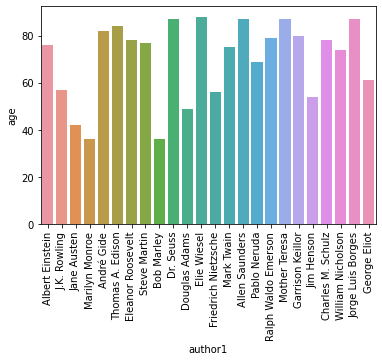

In [14]:
DeathYear=[]
name_age = []
Age = []
count_author=[]
def tacgia2():
  for i in all_link:
      url = f'{i}'
      read = urlopen(url)
      soup = BeautifulSoup(read, 'html.parser')
      author1 = soup.find('span',itemprop="name").text
      count_author.append(author1)
      if (soup.find('div', itemprop="deathDate")) == None :
        deathyear = date.today().year
        DeathYear.append(deathyear)
      else:
        deadthyear = soup.find('div',itemprop="deathDate").text
        deadthyear = deadthyear.replace('','')[-4:]
        DeathYear.append(deadthyear)
      
      for i in range(len(DeathYear)):
        age = int(DeathYear[i]) - int(BirthYear[i])
        Age.append(age)
      age_author = [author1,age]
      name_age.append(age_author)
tacgia2() 
df_age = pd.DataFrame(name_age, columns=['author1','age' ])
df_age.head(10)
print(df_age)
gs = sns.barplot(data=df_age,x = 'author1', y ='age')
gs.set_xticklabels(gs.get_xticklabels(),rotation = 90)

plt.show()

- Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,

[Text(0, 0, 'Albert Einstein'),
 Text(0, 0, 'J.K. Rowling'),
 Text(0, 0, 'Bob Marley'),
 Text(0, 0, 'Dr. Seuss'),
 Text(0, 0, 'Marilyn Monroe'),
 Text(0, 0, 'Mother Teresa'),
 Text(0, 0, 'Allen Saunders'),
 Text(0, 0, 'Jorge Luis Borges'),
 Text(0, 0, 'William Nicholson'),
 Text(0, 0, 'Charles M. Schulz'),
 Text(0, 0, 'Jim Henson'),
 Text(0, 0, 'Garrison Keillor'),
 Text(0, 0, 'Ralph Waldo Emerson'),
 Text(0, 0, 'Pablo Neruda'),
 Text(0, 0, 'Friedrich Nietzsche'),
 Text(0, 0, 'Mark Twain'),
 Text(0, 0, 'Elie Wiesel'),
 Text(0, 0, 'Douglas Adams'),
 Text(0, 0, 'Steve Martin'),
 Text(0, 0, 'Eleanor Roosevelt'),
 Text(0, 0, 'Thomas A. Edison'),
 Text(0, 0, 'André Gide'),
 Text(0, 0, 'Jane Austen'),
 Text(0, 0, 'George Eliot')]

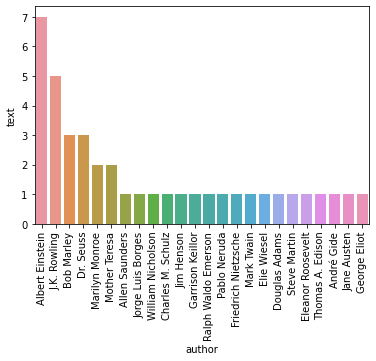

In [17]:
#thong ke tac gia va cau noi cua tac gia
data = pd.read_csv("quotes.csv")
author_quote = data['author'].value_counts()
author_quote = author_quote.reset_index()
author_quote.columns=['author','text']
gs = sns.barplot(data=author_quote,x = 'author', y ='text')
gs.set_xticklabels(gs.get_xticklabels(),rotation = 90)

Thống kê về năm sinh và độ tuổi của các tác giả,

In [18]:
year_dict = {}
age_dict = {}

for i in range(len(BirthYear)):
  if BirthYear[i] in year_dict:
      year_dict[BirthYear[i]] += 1
  else:
      year_dict[BirthYear[i]] = 1
  if Age[i] in age_dict:

    age_dict[Age[i]] += 1
  else:
    age_dict[Age[i]] = 1

print(year_dict)
print(age_dict)


{'1879': 7, '1965': 5, '1775': 1, '1926': 2, '1869': 1, '1847': 1, '1884': 1, '1945': 4, '1904': 4, '1952': 1, '1928': 1, '1844': 1, '1835': 1, '1899': 2, '1803': 1, '1910': 2, '1942': 1, '1936': 1, '1922': 1, '1948': 1, '1819': 1}
{76: 19, 57: 8, 42: 6, 36: 4, 82: 2, 84: 1}


Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, ...

In [8]:
#thong ke cau dai nhat cau ngan nhat
df.insert(4,"count_quote", df["text"].apply(lambda x: len(str(x).split(' '))), True)
words_count = df["text"].apply(lambda x: len(str(x).split(' ')))

df['Count_Words'] = words_count


df = df.sort_values(by=['Count_Words'], ascending=False)


df_count_word = df[['author','text','Count_Words']]

lengthest_word = df_count_word.iloc[0]

sortest_word = df_count_word.iloc[-1:]
print('Câu dài nhất:')
print(lengthest_word)
print("--------------------------------")
print('\nCâu ngắn nhất:',sortest_word)

df_count_word = df[['author','text','Count_Words']]

Câu dài nhất:
author                                            Marilyn Monroe
text           “This life is what you make it. No matter what...
Count_Words                                                  201
Name: 10, dtype: object
--------------------------------

Câu ngắn nhất:                author                                text  Count_Words
36  William Nicholson  “We read to know we're not alone.”            7


Thống kê về các từ được sử dụng trong các câu nói,

In [19]:
from collections import Counter
#thong ke so tu xuat hien trong cac cau noi
count_kitu = Counter(" ".join(df["text"]).split()).most_common(100)

print("số từ xuất hiện trong các câu nói ",count_kitu)


số từ xuất hiện trong các câu nói  [('you', 47), ('is', 36), ('to', 33), ('a', 23), ('of', 21), ('that', 17), ('not', 17), ('the', 16), ('be', 15), ('and', 15), ('it', 12), ('your', 11), ('in', 11), ('I', 10), ('but', 9), ('have', 8), ('more', 8), ('her', 8), ('she', 8), ('can', 8), ('what', 7), ('are', 7), ('or', 7), ("it's", 7), ('our', 6), ('“It', 6), ('than', 6), ('The', 6), ('up', 6), ('will', 6), ('may', 6), ('love', 6), ('“The', 5), ('as', 5), ('without', 5), ('who', 5), ('“I', 5), ('never', 5), ('make', 5), ('But', 5), ('them', 5), ('give', 5), ('because', 5), ("don't", 5), ('when', 5), ('we', 4), ('good', 4), ('for', 4), ('just', 4), ('know', 4), ('going', 4), ('-', 4), ('if', 4), ('makes', 4), ('so', 4), ('great', 4), ('opposite', 4), ('no', 4), ('live', 3), ('other', 3), ('like', 3), ("you're", 3), ('get', 3), ('most', 3), ('much', 3), ('all', 3), ('find', 3), ('fail', 3), ('at', 3), ('keep', 3), ('“If', 3), ('think', 3), ('indifference.', 3), ('from', 3), ('do', 3), ('time'

2.3. Trích xuất đặc trưng- Feature Extraction (5 điểm):
Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải
thích cách làm của bạn.

In [ ]:
!pip install -U sentence-transformers
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import sys

In [21]:
data = pd.read_csv("quotes.csv")
authors = data['author'].tolist()
cv = CountVectorizer()
sentences = cv.fit_transform(data['text'])
count_array = sentences.toarray()
df_count = pd.DataFrame(data=count_array,columns = cv.get_feature_names())
df_count.to_csv('features.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2.4. Suy luận (25 điểm):
Bạn được yêu cầu phân loại câu nói theo tên người nổi tiếng và tính độ tương đồng
phong cách nói giữa các tác giả theo 2 yêu cầu sau:
- Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích
xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù
hợp? (15 điểm)


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(sentences, authors, test_size=0.1, random_state=10)

#Apply classification model
clf = MultinomialNB()
clf.fit(features_train, labels_train)
accuracy_score(labels_test,clf.predict(features_test))

test = ["It is our choices, Harry, that show what we truly are, far more than our abilities."]

vect = cv.transform(test).toarray()
print('Tác giả của câu nói:', test," chính là:" ,clf.predict(vect))

Tác giả của câu nói: ['It is our choices, Harry, that show what we truly are, far more than our abilities.']  chính là: ['J.K. Rowling']
